In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
data_folder = "/Users/mkamruz/Public/SNL/Projects/5UTR/Data/"

In [2]:
df = pd.read_csv(os.path.join(data_folder, 'combined_results.csv'))
tmp = df.drop(columns=['sequence','DNABERT2_cao2021', 'grover_cao2021', 'utrlm_cao2021'])
df['prediction_score'] = tmp.sum(axis=1)
del tmp
df.head()

,sequence,DNABERT2_cao2021,DNABERT2_hek,DNABERT2_hek_muscle,DNABERT2_hek_muscle_pc3,DNABERT2_hek_pc3,DNABERT2_mpra,DNABERT2_muscle,DNABERT2_muscle_pc3,DNABERT2_pc3,...,utrlm_cao2021,utrlm_hek,utrlm_hek_muscle,utrlm_hek_muscle_pc3,utrlm_hek_pc3,utrlm_mpra,utrlm_muscle,utrlm_muscle_pc3,utrlm_pc3,prediction_score
0,GTTCTATAGACATGAATGATTTGCG,0,1,1,1,1,1,0,1,1,...,1.0,0,0,0,0,0,1,1,1,15.0
1,CATTGACTAGCCCCATCCAATTGTA,0,1,1,1,1,1,0,1,1,...,1.0,0,1,1,1,1,0,0,1,18.0
2,CAGGCCTGTGGACGGCAAGTCTAGT,1,1,1,1,1,1,0,1,1,...,0.0,1,1,1,1,1,1,1,1,18.0
3,AGTTCAGACGCTATCTCTCACGATT,1,1,1,1,0,1,0,1,1,...,0.0,1,1,1,1,0,0,1,1,20.0
4,CGAAAGGTTGCGATCTCAGTTGTGC,1,0,0,1,1,1,1,1,1,...,1.0,1,1,1,1,1,1,1,0,20.0


In [4]:
df.prediction_score.min(), df.prediction_score.max()

(np.float64(0.0), np.float64(24.0))

In [2]:
def compute_prection_scores(df):
    tmp = df.drop(columns=['sequence','DNABERT2_cao2021', 'grover_cao2021', 'utrlm_cao2021'])
    v = tmp.sum(axis=1).values.tolist()
    del tmp
    return v

def compute_gc_content(sequences):
    def gc(seq):
        gc_count = seq.count('G') + seq.count('C')
        return gc_count / len(seq) if len(seq) > 0 else 0
    
    return [gc(seq) for seq in sequences]

df = pd.read_csv(os.path.join(data_folder, 'combined_results.csv'))
df['prediction_score'] = compute_prection_scores(df)
df['gc_content'] = compute_gc_content(df['sequence'])
df = df[['sequence', 'gc_content', 'prediction_score']].drop_duplicates()
df['prediction_score'] = df['prediction_score'].astype(int)
print(df['prediction_score'].min(), df['prediction_score'].max())
print(df.shape)
df.to_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'), index=False)
df.head()

0 24
(10000000, 3)


,sequence,gc_content,prediction_score
0,GTTCTATAGACATGAATGATTTGCG,0.36,15
1,CATTGACTAGCCCCATCCAATTGTA,0.44,18
2,CAGGCCTGTGGACGGCAAGTCTAGT,0.60,18
3,AGTTCAGACGCTATCTCTCACGATT,0.44,20
4,CGAAAGGTTGCGATCTCAGTTGTGC,0.52,20


In [3]:
df = pd.read_csv(os.path.join(data_folder, "random_25mers_10M.csv"))
df.columns = ['sequence', 'seq_index']
data = pd.read_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'))
data.prediction_score = data.prediction_score.astype(int)
data = data.merge(df, on='sequence')
print(data.shape, df.shape)
del [df]
v = []
for i,s,p in zip(data.seq_index.values, data.sequence.values, data.prediction_score.values):
    v.append(f">gi|{1+i}|{p}")
    v.append(f"{s}")

with open(os.path.join(data_folder, "random_25mers_10M.fa"), "w") as f:
    f.write("\n".join(v))

del [data, v]

(10000000, 4) (10000000, 2)


In [8]:
df = pd.read_csv(os.path.join(data_folder, "random_25mers_10M.csv"))
df.columns = ['sequence', 'seq_index']
data = pd.read_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'))
data.prediction_score = data.prediction_score.astype(int)
data = data.merge(df, on='sequence')
print(data.shape, df.shape)
print(data['prediction_score'].min(), data['prediction_score'].max())
del [df]

data = data[data.prediction_score<=10]
print(data['prediction_score'].min(), data['prediction_score'].max())
print(data.shape)

(10000000, 4) (10000000, 2)
0 24
0 10
(147770, 4)


In [12]:
data[data.seq_index==212]

,sequence,gc_content,prediction_score,seq_index


In [13]:
# Score 0-10
df = pd.read_csv(os.path.join(data_folder, "random_25mers_10M.csv"))
df.columns = ['sequence', 'seq_index']
data = pd.read_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'))
data.prediction_score = data.prediction_score.astype(int)
data = data.merge(df, on='sequence')
print(data.shape, df.shape)
print(data['prediction_score'].min(), data['prediction_score'].max())
del [df]

data = data[data.prediction_score<=10]
print(data['prediction_score'].min(), data['prediction_score'].max())
print(data.shape)

v = []
for i,s,p in zip(data.seq_index.values, data.sequence.values, data.prediction_score.values):
    v.append(f">gi|{1+i}|{p}")
    v.append(f"{s}")

with open(os.path.join(data_folder, "random_25mers_10M_0_10.fa"), "w") as f:
    f.write("\n".join(v))

del [data, v]

(10000000, 4) (10000000, 2)
0 24
0 10
(147770, 4)


In [14]:
# Score 0-11
df = pd.read_csv(os.path.join(data_folder, "random_25mers_10M.csv"))
df.columns = ['sequence', 'seq_index']
data = pd.read_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'))
data.prediction_score = data.prediction_score.astype(int)
data = data.merge(df, on='sequence')
print(data.shape, df.shape)
print(data['prediction_score'].min(), data['prediction_score'].max())
del [df]

data = data[data.prediction_score<=11]
print(data['prediction_score'].min(), data['prediction_score'].max())
print(data.shape)

v = []
for i,s,p in zip(data.seq_index.values, data.sequence.values, data.prediction_score.values):
    v.append(f">gi|{1+i}|{p}")
    v.append(f"{s}")

with open(os.path.join(data_folder, "random_25mers_10M_0_11.fa"), "w") as f:
    f.write("\n".join(v))

del [data, v]

(10000000, 4) (10000000, 2)
0 24
0 11
(283537, 4)


In [15]:
# Score 23-24
df = pd.read_csv(os.path.join(data_folder, "random_25mers_10M.csv"))
df.columns = ['sequence', 'seq_index']
data = pd.read_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'))
data.prediction_score = data.prediction_score.astype(int)
data = data.merge(df, on='sequence')
print(data.shape, df.shape)
print(data['prediction_score'].min(), data['prediction_score'].max())
del [df]

data = data[np.logical_and(data.prediction_score>=23, data.prediction_score<=24)]
print(data['prediction_score'].min(), data['prediction_score'].max())
print(data.shape)

v = []
for i,s,p in zip(data.seq_index.values, data.sequence.values, data.prediction_score.values):
    v.append(f">gi|{1+i}|{p}")
    v.append(f"{s}")

with open(os.path.join(data_folder, "random_25mers_10M_23_24.fa"), "w") as f:
    f.write("\n".join(v))

del [data, v]

(10000000, 4) (10000000, 2)
0 24
23 24
(205184, 4)


In [4]:
df = pd.read_csv(os.path.join(data_folder, 'gc_content_predictions_no_cao2021.csv'))
df.prediction_score = df.prediction_score.astype(int)
print(df.shape)
df.head()

(10000000, 3)


,sequence,gc_content,prediction_score
0,GTTCTATAGACATGAATGATTTGCG,0.36,15
1,CATTGACTAGCCCCATCCAATTGTA,0.44,18
2,CAGGCCTGTGGACGGCAAGTCTAGT,0.60,18
3,AGTTCAGACGCTATCTCTCACGATT,0.44,20
4,CGAAAGGTTGCGATCTCAGTTGTGC,0.52,20


In [5]:
df.gc_content.min(), df.gc_content.max(), df.prediction_score.min(), df.prediction_score.max()

(np.float64(0.04), np.float64(0.96), np.int64(0), np.int64(24))

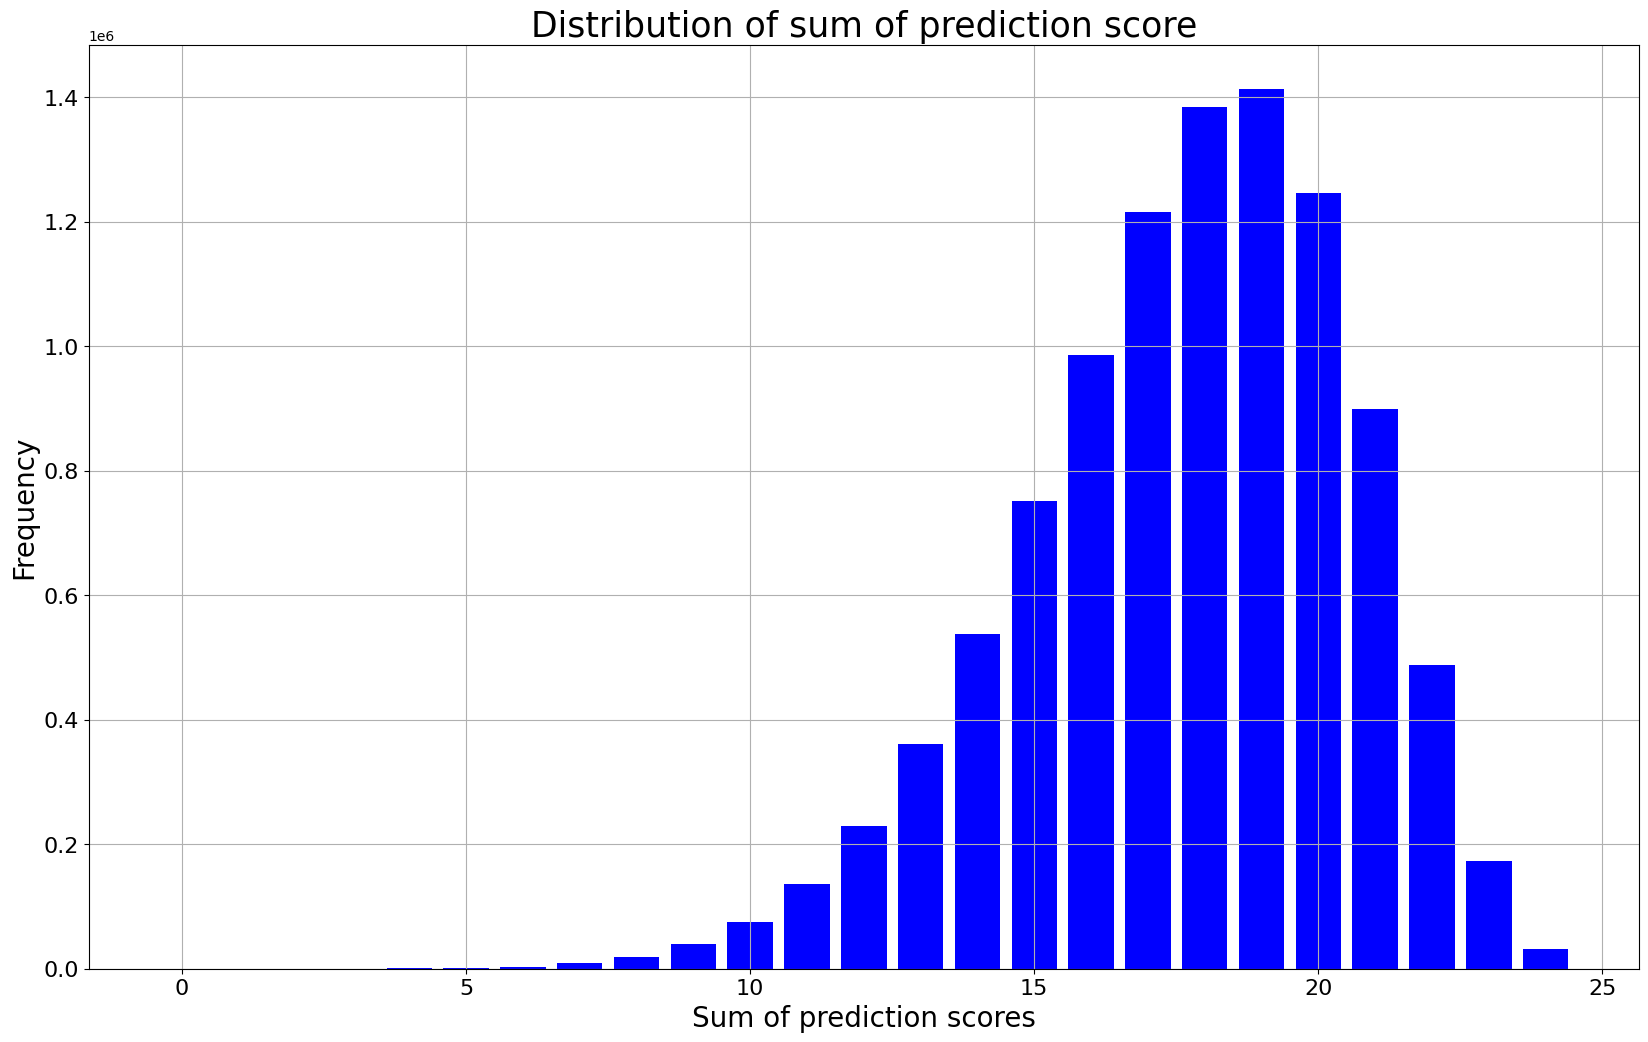

In [6]:
import collections
f = collections.Counter(df.prediction_score)
plt.figure(figsize=(20, 12))
plt.bar(f.keys(), f.values(), color='blue')
plt.xlabel('Sum of prediction scores', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Frequency', fontsize=20)
plt.title(f'Distribution of sum of prediction score', fontsize=25)
plt.grid()
plt.show()

In [7]:
for k in sorted(f.keys()):
    print(f"{k}: {f[k]}")

0: 2
1: 2
2: 31
3: 146
4: 475
5: 1402
6: 3562
7: 8692
8: 18955
9: 39068
10: 75435
11: 135767
12: 228457
13: 361206
14: 537281
15: 751300
16: 986464
17: 1216191
18: 1384316
19: 1413533
20: 1246333
21: 898810
22: 487388
23: 173607
24: 31577


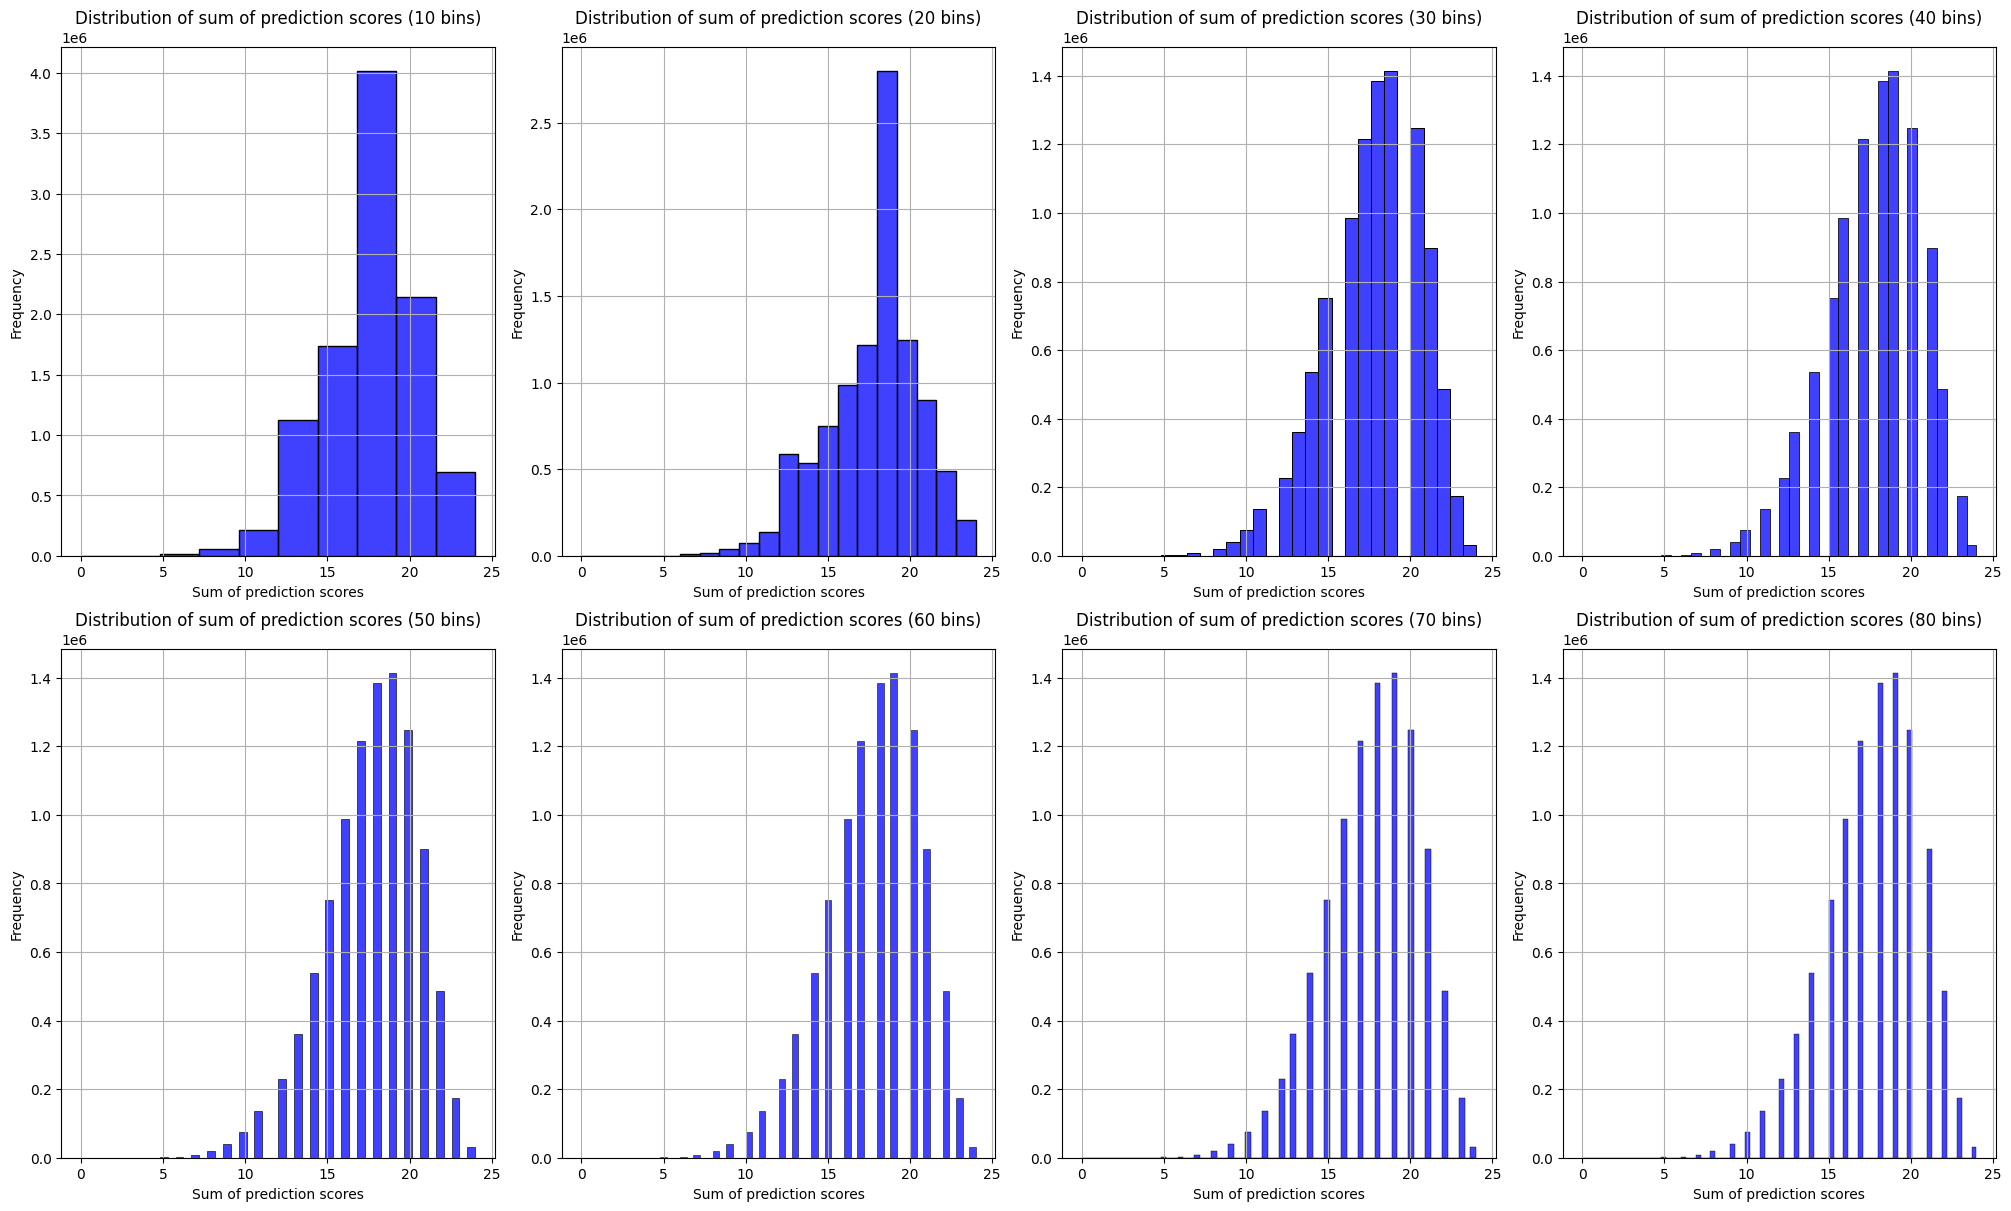

In [8]:
fig, ax = plt.subplots(figsize=(20, 12), ncols=4, nrows=2, constrained_layout=True)
r,c=0,0
for b in range(10, 90, 10):
    sns.histplot(df['prediction_score'], bins=b, kde=False, color='blue', stat='count', ax=ax[r][c])
    ax[r][c].set_xlabel('Sum of prediction scores')
    ax[r][c].set_ylabel('Frequency')
    ax[r][c].set_title(f'Distribution of sum of prediction scores ({b} bins)')
    ax[r][c].grid()
    c = (c+1)%4
    if c == 0:
        r += 1
    
plt.show()

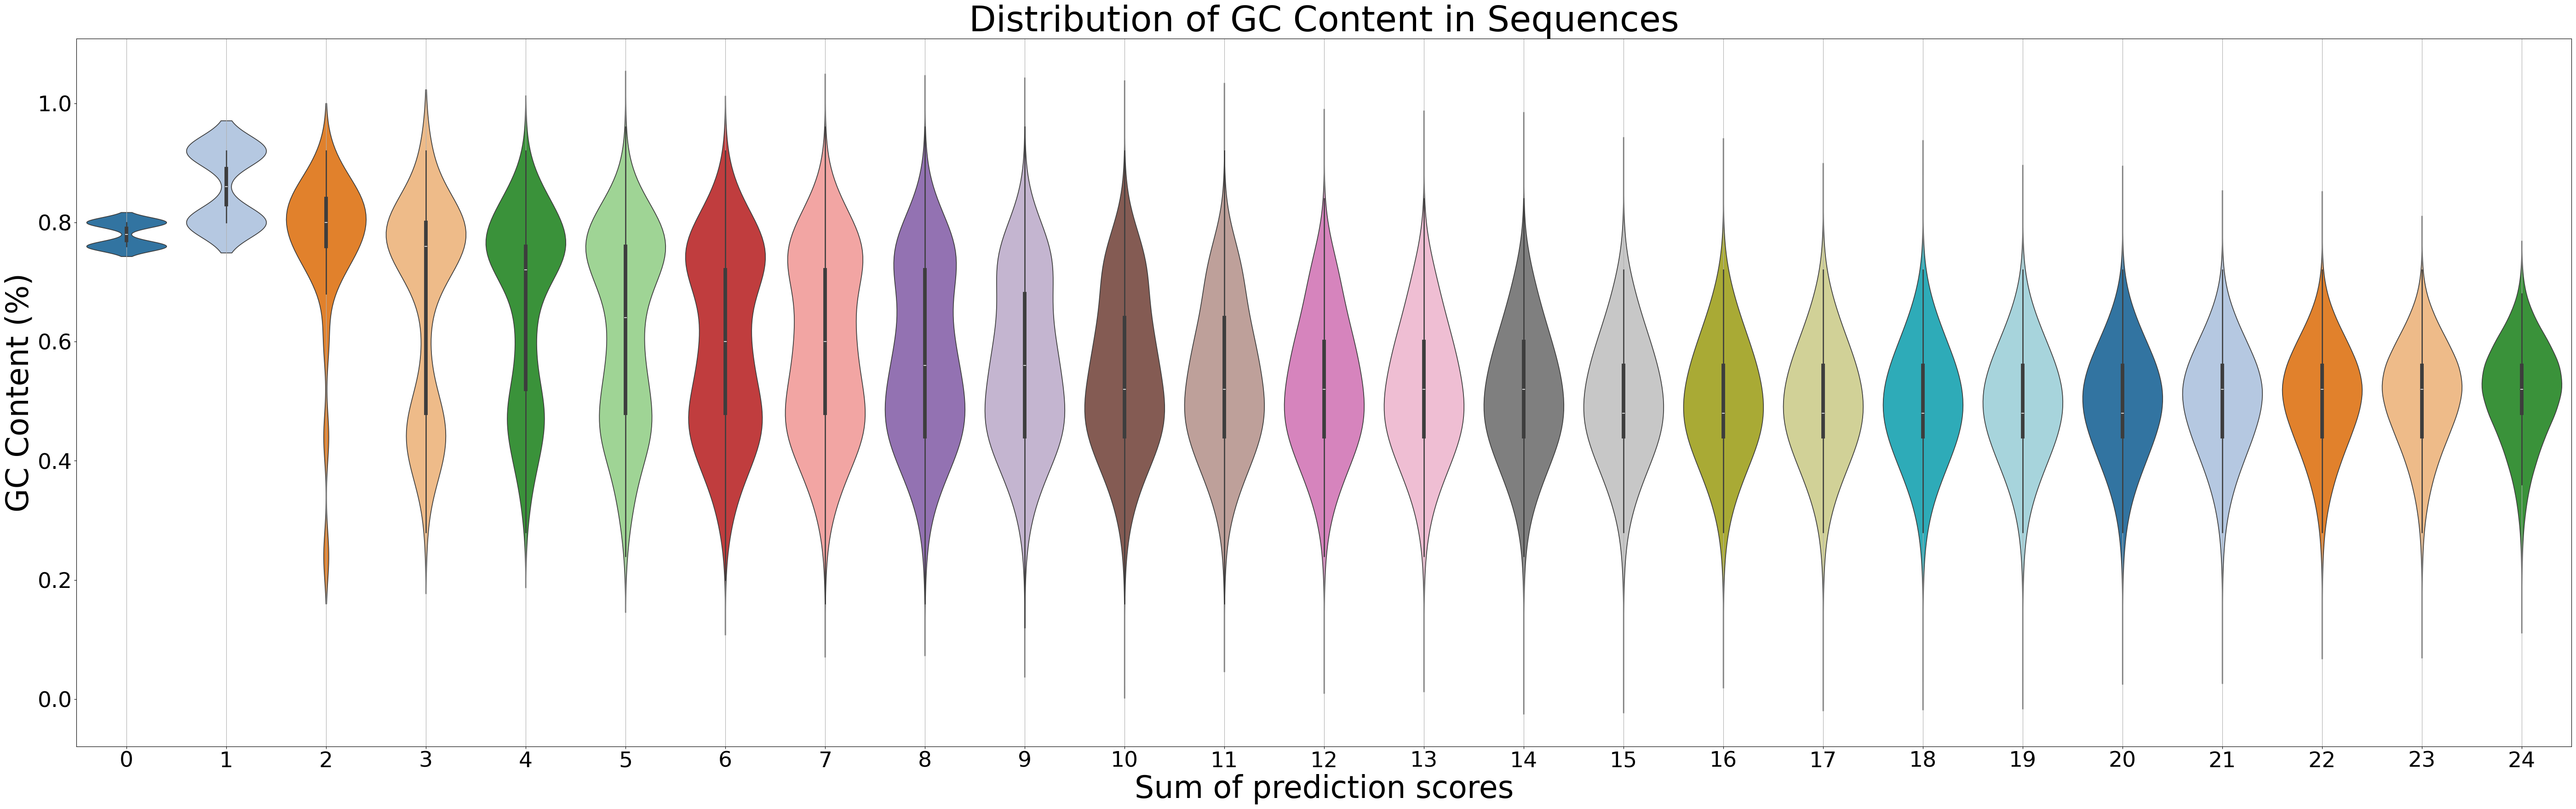

In [9]:
plt.figure(figsize=(70, 20))
sns.violinplot(data=df, 
               y='gc_content', 
               x='prediction_score', 
               hue='prediction_score', 
               palette='tab20', 
               inner='box', 
               color='blue', 
               legend=False, bw_method=0.3) # inner='quartile', color='lightblue')
plt.ylabel('GC Content (%)', fontsize=48)
plt.xlabel('Sum of prediction scores', fontsize=48)
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
plt.title('Distribution of GC Content in Sequences', fontsize=55)
plt.grid(axis='x')
plt.show()

plt.scatter(df.pr)

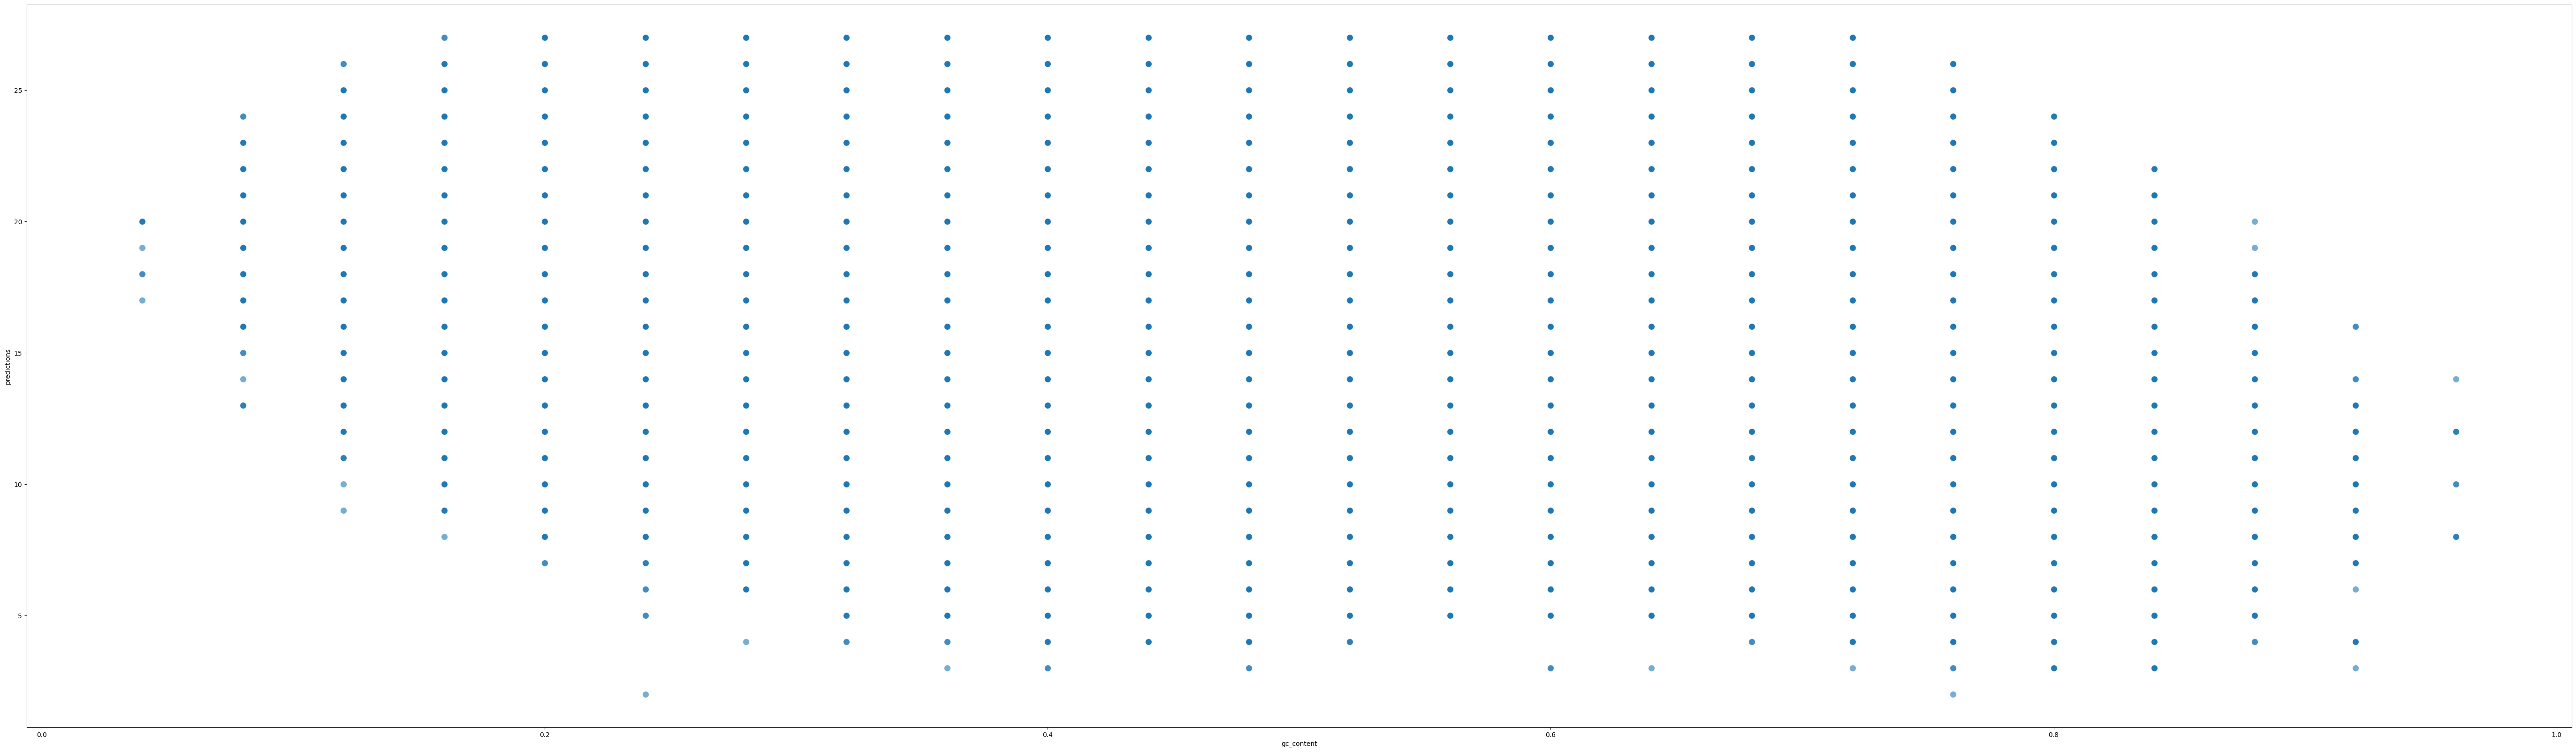

In [43]:
plt.figure(figsize=(70, 20))
sns.scatterplot(data=df, y='predictions', x='gc_content', s=100, alpha=0.6)
plt.show()

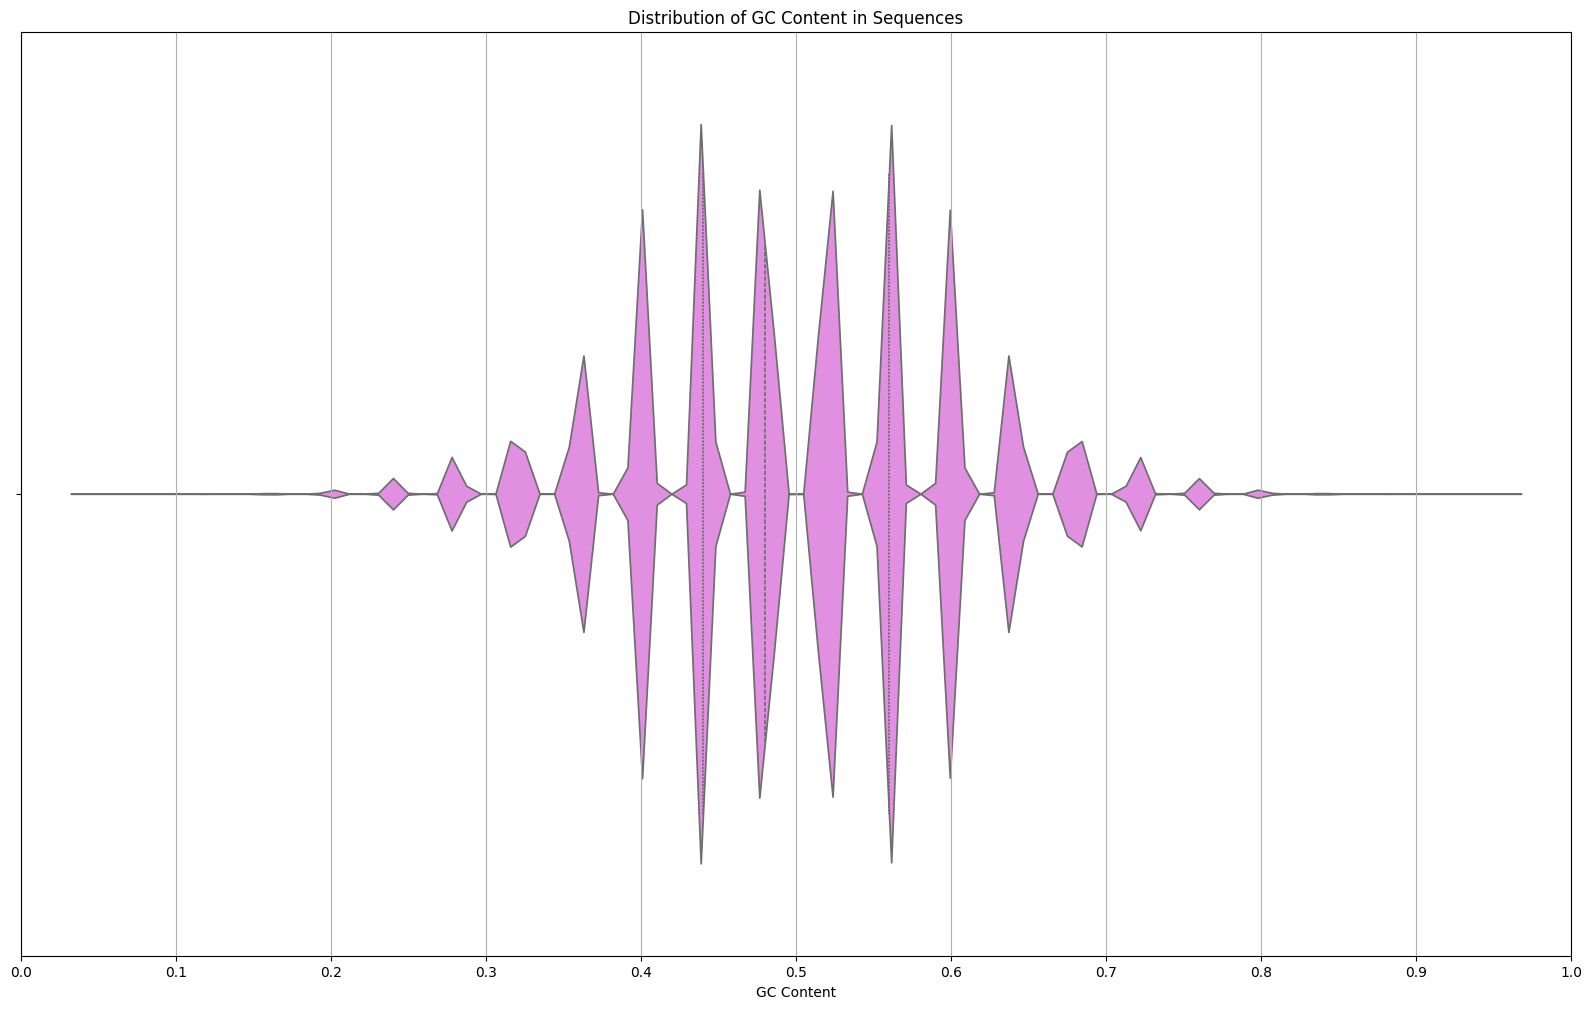

In [9]:
plt.figure(figsize=(20, 12))
sns.violinplot(data=df, x='gc_content', inner='quartile', color='violet') # inner='quartile', color='lightblue')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('GC Content')
plt.title('Distribution of GC Content in Sequences')
plt.grid(axis='x')
plt.show()

In [ ]:
from sklearn.cluster import HDBSCAN

dbscan = HDBSCAN(min_samples=2, min_cluster_size=20, cluster_selection_epsilon=10)
dbscan.fit(df.drop(columns=['sequence', 'gc_content']))
print("Cluster labels:", dbscan.labels_)

In [ ]:
seq_dist = compute_gc_content_distribution(sequences)

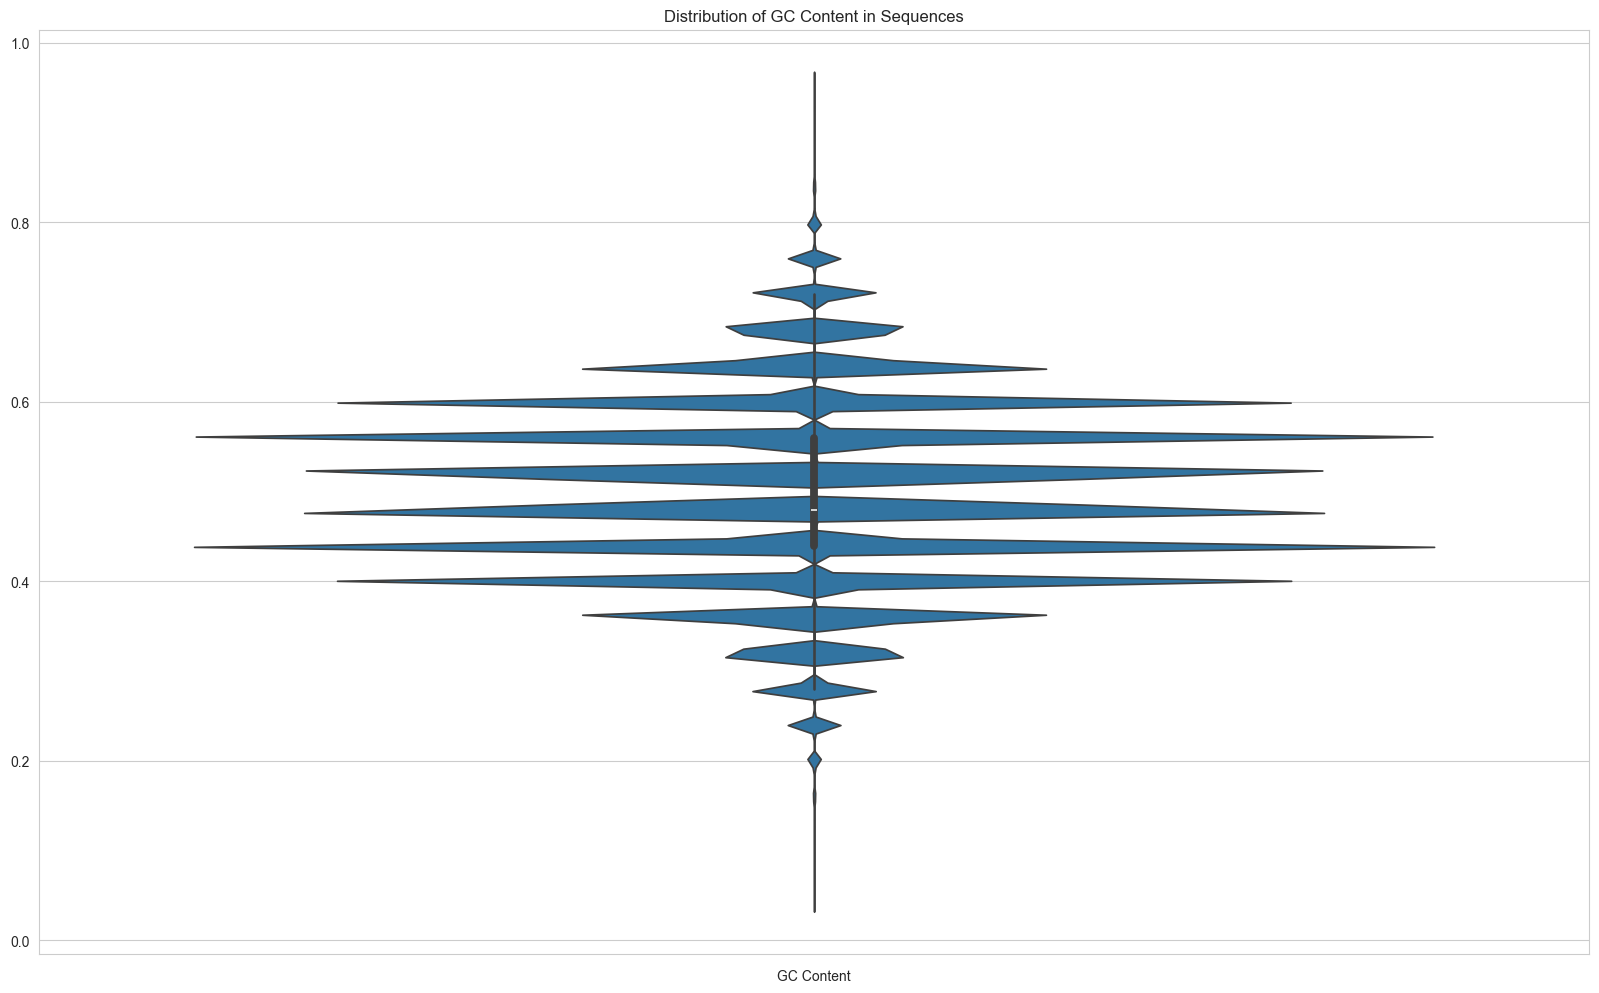

In [ ]:
plt.figure(figsize=(20, 12))
# Set the style of the plot
sns.set_style("whitegrid")

sns.violinplot(seq_dist, ) # inner='quartile', color='lightblue')
#plt.xlim(0, 1)
#plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('GC Content')
plt.title('Distribution of GC Content in Sequences')
#plt.grid(axis='x')
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from multimolecule import UtrLmForSequencePrediction
import numpy as np
import pandas as pd

import pytorch_lightning as L
from transformers import AutoTokenizer, Trainer, BertForSequenceClassification

In [16]:
tokenizer = AutoTokenizer.from_pretrained("multimolecule/utrlm-te_el")
model = BertForSequenceClassification.from_pretrained("../UTRLM_Ckpt/checkpoint-3100")

N = 32*100
text = [''.join([np.random.choice(["A", "C", "G", "T"]) for _ in range(50)]) for _ in range(N)]
labels = np.random.randint(0, 2, size=(N,))
train_df = pd.DataFrame({
    'text': text,
    'labels': labels
})
model

You are using a model of type utrlm to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../UTRLM_Ckpt/checkpoint-3100 and are newly initialized: ['bert.embeddings.LayerNorm.bias', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.word_embeddings.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(26, 128, padding_idx=0)
      (position_embeddings): Embedding(1026, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12,

In [ ]:
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_df,
    eval_dataset=train_df,
    max_epochs=1,
    gpus=1 if torch.cuda.is_available() else 0,
    enable_checkpointing=False,
    enable_model_summary=False,
    enable_progress_bar=False,
)

trainer.predict(
    model=model,
    dataloaders=None,
    return_predictions=True,
    return_outputs=True,
    dataloader_idx=0,
    max_length=512,
    pad_to_max_length=True,
    return_tensors="pt",
    output_hidden_states=False,
    output_attentions=False,
    ignore_keys=None,

In [17]:
model.eval()
with torch.no_grad():
    inputs = tokenizer(train_df['text'].tolist(), return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

print("Predictions:", sum(predictions.tolist()))
print("Labels:", sum(train_df['labels'].tolist()))

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Predictions: 0
Labels: 1634


In [9]:
class DNADataModule(object):
    def __init__(self, train_df, tokenizer, batch_size=32, max_length=512):
        super().__init__()
        self.train_df = train_df
        self.tokenizer = tokenizer
        self.batch_size = batch_size
        self.max_length = max_length

    def setup(self, stage=None):
        self.train_dataset = self.train_df

    def train_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            collate_fn=self.collate_fn
        )

    def collate_fn(self, batch):
        texts = [item['text'] for item in batch]
        labels = torch.tensor([item['labels'] for item in batch])
        tok = self.tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=self.max_length)
        return {
            "input_ids": tok["input_ids"],
            "attention_mask": tok["attention_mask"],
            "labels": labels
        }

In [11]:
trainer = Trainer(
    accelerator="cpu",
    devices=1,
    max_epochs=1,
    logger=False,
    enable_progress_bar=False,
)

test_dl = DNADataModule(train_df, tokenizer, max_length=512)
test_dl.setup()
test_dl = test_dl.train_dataloader()

preds = trainer.predict(
    model=model,
    dataloaders=test_dl,
    return_predictions=True
)

print(preds[:100])
print(labels[:100])

NameError: name 'Trainer' is not defined

In [20]:
N = 1000000
M = 36
data1 = np.random.randint(0, 2, size=(N, M))
data2 = np.random.randint(0, 2, size=(N, M))
data3 = np.random.randint(0, 2, size=(N, M))

def get_sum(data, axis=0):
    return np.sum(data, axis=axis).tolist()

(1000000, 3)
[52 54 59 ... 53 55 49]


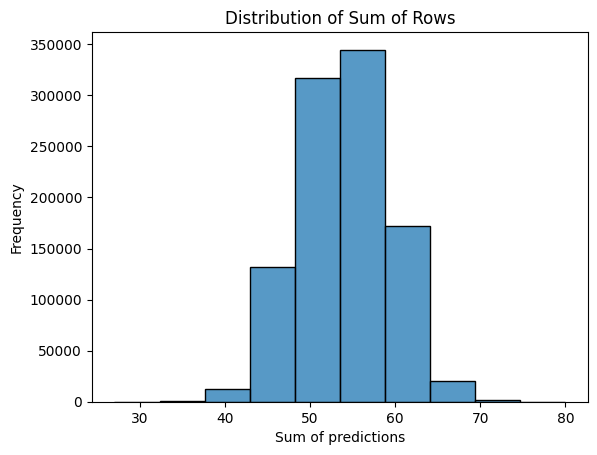

In [24]:
df = []
for data in [data1, data2, data3]:
    df.append(get_sum(data, axis=1))

df=np.array(df).T
print(df.shape)
res = df.sum(axis=1)
print(res)

sns.histplot(res, bins=10)
plt.xlabel('Sum of predictions')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of Rows')
plt.show()